In [0]:
import numpy as np # linear algebra
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
#Generating training and testing datasets
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip= True)
valid_datagen= ImageDataGenerator(rescale=1./255)

train_set= train_datagen.flow_from_directory('C://Users//AJAY//Desktop//google landmark//LandmarkDataset//training_set', 
                                             target_size=(80,80), batch_size=28, class_mode='categorical', 
                                             shuffle=True, seed=20)
valid_set= valid_datagen.flow_from_directory('C://Users//AJAY//Desktop//google landmark//LandmarkDataset//test_set', 
                                             target_size=(80,80), batch_size=22, class_mode='categorical', 
                                             shuffle=False)

Found 456 images belonging to 7 classes.
Found 115 images belonging to 7 classes.


In [0]:
#Creating model
model=Sequential()
model.add(Conv2D(64, (3,3), input_shape=(80,80,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [0]:
#Compile and fit the datsets
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
step_size_train=train_set.n//train_set.batch_size
step_size_valid=valid_set.n//valid_set.batch_size
model.fit_generator(train_set, steps_per_epoch=50, epochs=10, 
                    validation_data= valid_set, validation_steps=22)

Epoch 1/10
23/50 [============>.................] - ETA: 4:12 - loss: 1.8864 - acc: 0.2772

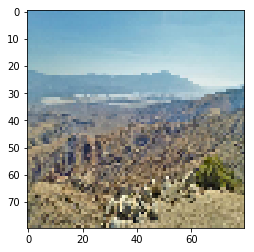

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  1.0
Landmark_5:  0.0
Landmark_6:  0.0
Landmark_7:  0.0


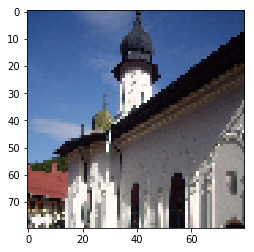

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  1.0
Landmark_7:  1.5307835e-18


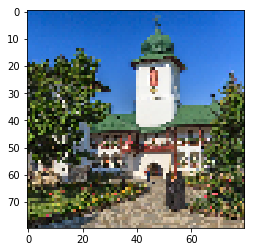

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  1.5718515e-32
Landmark_5:  1.0
Landmark_6:  0.0
Landmark_7:  0.0


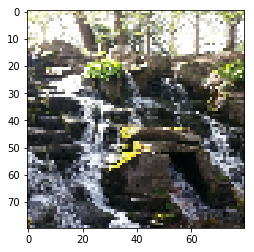

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  1.0
Landmark_7:  0.0


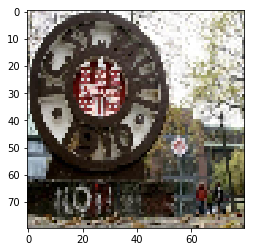

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  0.0
Landmark_7:  1.0


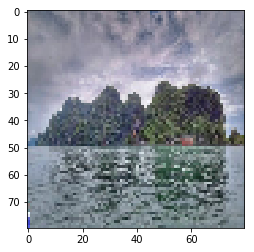

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  0.0
Landmark_5:  0.0027169692
Landmark_6:  0.0
Landmark_7:  0.997283


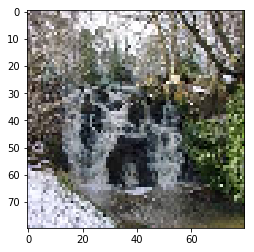

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  1.0
Landmark_7:  0.0


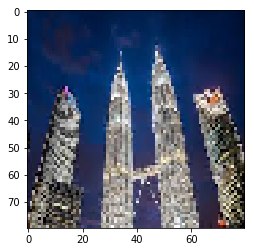

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  0.0
Landmark_7:  1.0


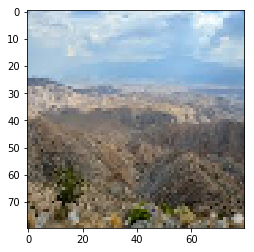

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  0.0
Landmark_4:  1.0
Landmark_5:  0.0
Landmark_6:  0.0
Landmark_7:  0.0


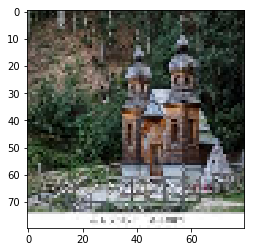

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  1.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  0.0
Landmark_7:  0.0


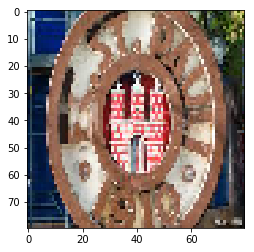

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  1.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  0.0
Landmark_7:  0.0


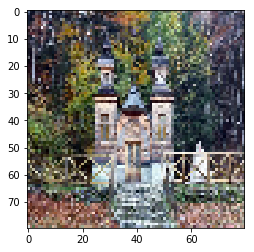

Landmark_1:  0.0
Landmark_2:  0.0
Landmark_3:  1.5736882e-16
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  1.0
Landmark_7:  0.0


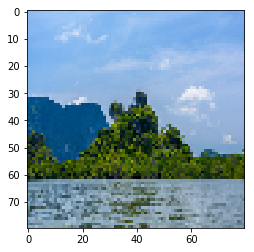

Landmark_1:  0.0
Landmark_2:  1.0
Landmark_3:  0.0
Landmark_4:  0.0
Landmark_5:  0.0
Landmark_6:  0.0
Landmark_7:  0.0


In [0]:
#Predict for new images
import os
image_list=os.listdir('C://Users//AJAY//Desktop//google landmark//LandmarkDataset//predict_set//')
for st in image_list:
    img=image.load_img('C://Users//AJAY//Desktop//google landmark//LandmarkDataset//predict_set//'+ st, target_size=(80,80))
    plt.imshow(img)
    plt.show()
    img=image.img_to_array(img)
    img=img.reshape(1,80,80,3)
    pred=model.predict(img)
    print('Landmark_1: ',pred[0][0])
    print('Landmark_2: ',pred[0][1])
    print('Landmark_3: ',pred[0][2])
    print('Landmark_4: ',pred[0][3])
    print('Landmark_5: ',pred[0][4])
    print('Landmark_6: ',pred[0][5])
    print('Landmark_7: ',pred[0][6])    
